In [22]:
%load_ext autoreload
%autoreload 2
from IPython.core.display import HTML
HTML('<style>.container { width:95% !important; }</style>')
HTML('<style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
%matplotlib inline
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

import time
timestamp = time.strftime('%Y_%m_%d_%H_%M_%S')
print timestamp

root_dir = './'

src_dir = os.path.join(root_dir, 'code')
# add the 'code' directory as one where we can import modules
# prepend it to the path so that it can mask mosubdules with the same name, i.e. eden
sys.path = [src_dir] + sys.path

out_data_dir = os.path.join(root_dir, timestamp)
if not os.path.exists(out_data_dir): os.mkdir(out_data_dir)

# configure logger
from eden.util import configure_logging
import logging
logger = logging.getLogger()
log_fname = os.path.join(out_data_dir, 'log.txt')
configure_logging(logger, verbosity=1, filename=log_fname)

2016_11_23_19_39_52


In [24]:
import requests

def save(text, full_out_file_name):
    with open(full_out_file_name, 'w') as f:
        for line in text:
            f.write("%s\n" % line.encode('utf8').strip())

def rfam_uri(family_id, out_data_dir):
    # retrieve the seed sequences from RFAM and save them to file
    uri = 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id) 
    rfam_dir = os.path.join(out_data_dir, 'RNA')
    fname = family_id + '.fa'
    if not os.path.exists(rfam_dir):
        os.mkdir(rfam_dir)
    full_out_file_name = os.path.join(rfam_dir, fname)
    if not os.path.isfile(full_out_file_name):
        text = requests.get(uri).text.split('\n')
        save(text, full_out_file_name)
    return full_out_file_name

rfam_id = 'RF00005' #tRNA
data = rfam_uri(rfam_id, out_data_dir)

from eden.converter.fasta import fasta_to_sequence
seqs = list(fasta_to_sequence(data))

header, seq = seqs[4]
print header
print seq

Starting new HTTP connection (1): rfam.xfam.org
AB017063.1/58819-58900
GUGGACGUGCCGGAGUGGUUAUCGGGCAUGACUAGAAAUCAUGUGGGCUUUGCCCGCGCAGGUUCGAAUCCUGCCGUUCACG


In [25]:
from RaSE import StructuralStabilityEstimator
rase = StructuralStabilityEstimator(k=6, avg_bp_prob_cutoff=0.1, hard_threshold=0.51)

In [26]:
for line in rase.transform(seq): print line

             (((((((((((.((.......)).))))..............((((((...))))))(((((.......)))))))))))).
  0 G C 0.63 ((((.((((((.((.......)).)))))).)))).......((((((...))))))(((((.......)))))........ 
  1 U C 0.61 ((((.((((((.((.......)).))))))...........(((((((...)))))))((((.......))))))))..... 
  2 G A 0.64 .(((.((((((.((.......)).)))))).)))........((((((...))))))(((((.......)))))........ 
  3 G U 0.70 (((..((((((.((.......)).))))))............((((((...))))))(((((.......)))))....))). 
  4 A G 0.35 (((((((((((.((.......)).))))..............((((((...))))))(((((.......)))))))))))). 
  5 C A 0.64 (((((.(((((.((.......)).))))).............((((((...))))))(((((.......)))))..))))). 
  6 G A 0.69 (((((((((((.((.......)).))))))............((((((...))))))(((((.......)))))..))))). 
  7 U G 0.71 (((((((((((.((.......)).)))((((.......))))((((((...)))))).((((.......)))))))))))). 
  8 G A 0.48 (((((((..((.((.......)).))(((((.......)))))(((((...))))).(((((.......)))))))))))). 
  9 C G 0.23 (((((((.((((((((..

In [28]:
print rase.alternatives

CCAUGAAGAGUACCCGAAGCGAAACUAGGCGUCCCGGUCGCCUAUCCUGACCGAACAUUCCCCCACCCAUGCUAGUGAACGU


In [29]:
print rase.scores

[0.63350333195090813, 0.61361253317763664, 0.63816173175051827, 0.70261006719602737, 0.34703163580313101, 0.64254509556977424, 0.69023613524357663, 0.70529571707658334, 0.47553899561065482, 0.23490726830878469, 0.48469069423208927, 0.54600371453671404, 0.31864598917319847, 0.36694680093426107, 0.46339801444633888, 0.95410757828019443, 0.9632243932646436, 0.96428125422396538, 0.53022634991092177, 0.47147796954494547, 0.32424331743419071, 0.37166445707947399, 0.43090248362769223, 0.4709554431463373, 0.445466769475869, 0.42244466696543215, 0.45380529281429688, 0.47926236137539474, 0.44632205009450382, 0.77977215612761752, 0.35922117043467666, 0.75798233266273307, 0.39629940123681018, 0.4479686581957909, 0.33254768688256003, 0.46259308277672495, 0.87576194008148511, 0.46999063865304413, 0.46974937736916028, 0.46485870457692408, 0.44269494990791375, 0.49950535241938687, 0.34841344924636009, 0.6720508547867371, 0.41214218504866151, 0.29849235496435256, 0.40015989396169194, 0.4970209329743747

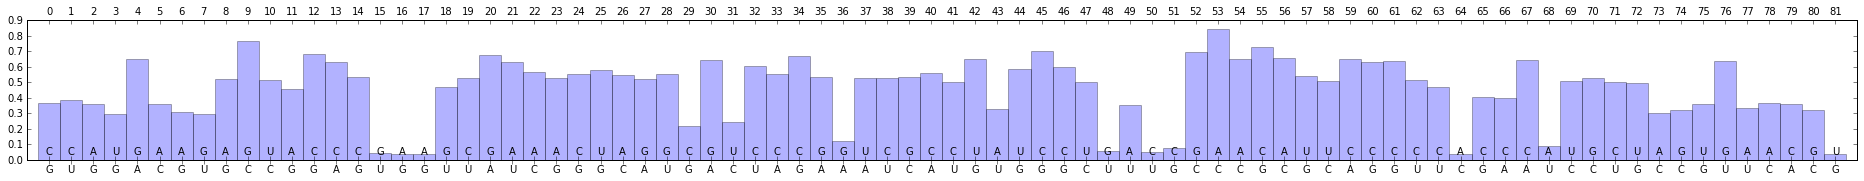

In [30]:
rase.plot()

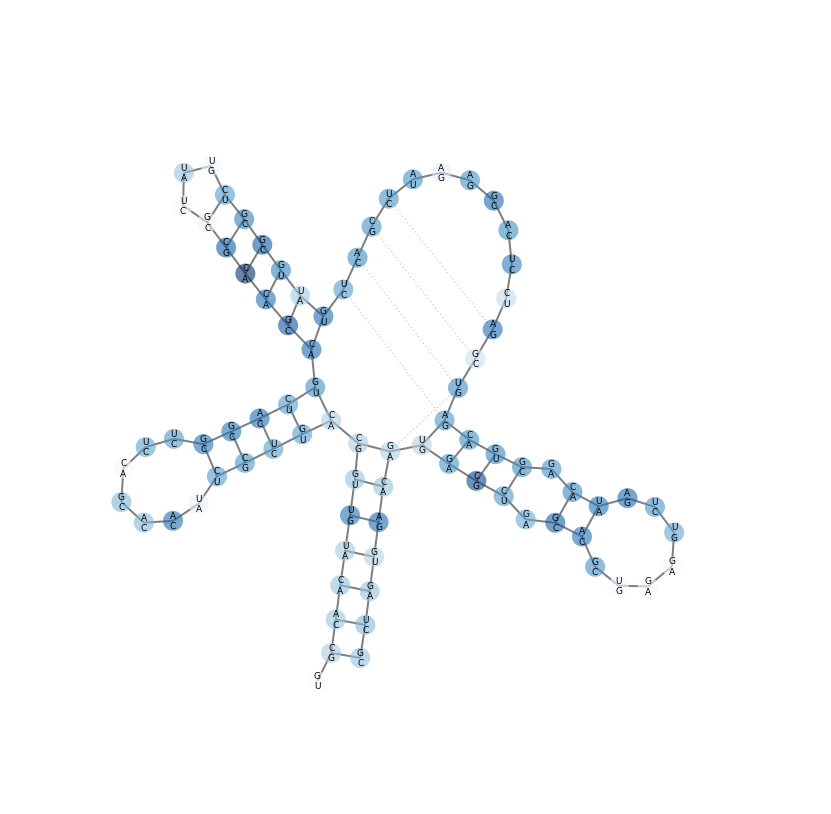

In [31]:
rase.draw()

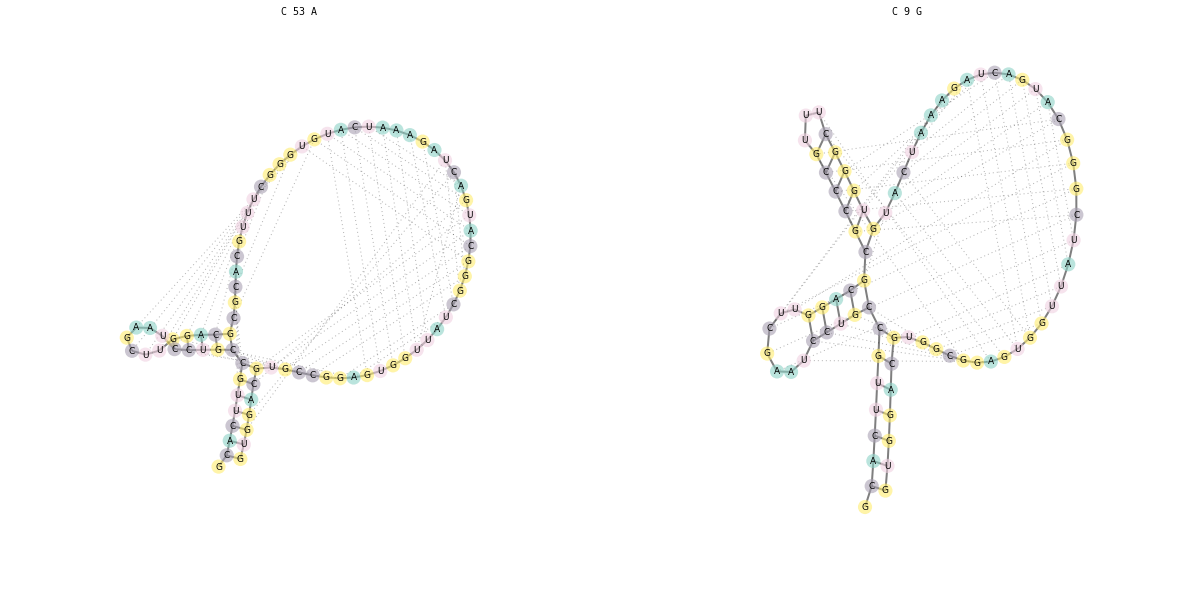

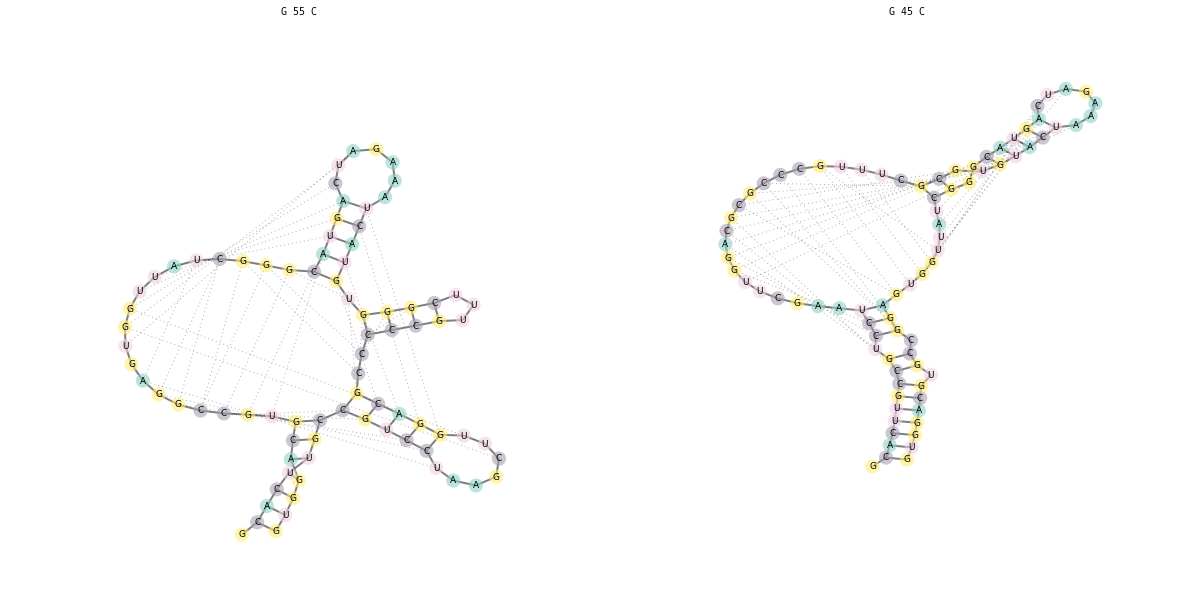

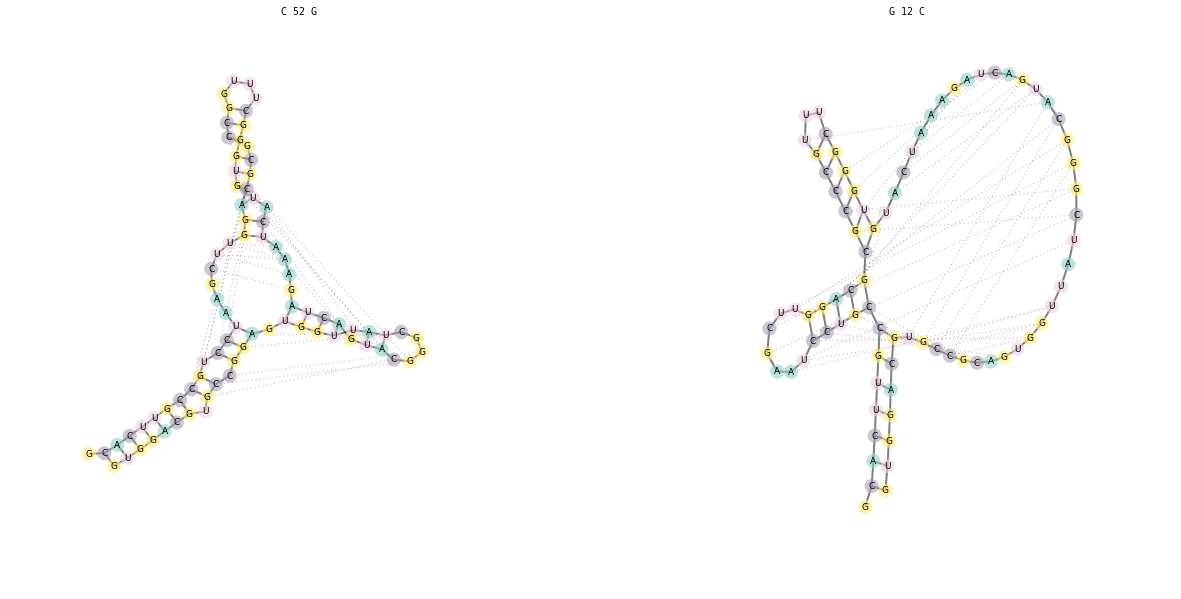

In [32]:
rase.draw_all()

---